# Proyecto 2 - Inteligencia Artificial 2023

### Comisión 4 - Fredes Simón - Ilz Matias



---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers, Input

# Carga y análisis de datos

In [48]:
# Cargar el dataset.
df_futbol = pd.read_csv('./football_train.csv')

print("Cantidad de ejemplos: {}\nCantidad de columnas: {}".format(df_futbol.shape[0], df_futbol.shape[1]))
print()

# Nombre de las columnas
print("Columnas del dataset: {}".format(list(df_futbol.columns)))
print()

# Ver los primeros ejemplos del dataset.
df_futbol

Cantidad de ejemplos: 1409
Cantidad de columnas: 23

Columnas del dataset: ['Team', 'Season', 'Matchday', 'Manager', 'Stadium', 'Stadium_capacity', 'Player_age_avg', 'Possession_%', 'Shots', 'Shots_on_target', 'Touches', 'Passes', 'Tackles', 'Clearances', 'Corners', 'Offsides', 'Fouls_conceded', 'Goals', 'ConcededGoals', 'Yellow_cards', 'Red_cards', 'Position', 'Field_zone']



,Team,Season,Matchday,Manager,Stadium,Stadium_capacity,Player_age_avg,Possession_%,Shots,Shots_on_target,...,Clearances,Corners,Offsides,Fouls_conceded,Goals,ConcededGoals,Yellow_cards,Red_cards,Position,Field_zone
0,Man Utd,22-23,19,Erik ten Hag,Old Trafford,74031,25.6,53.347059,244.0,93.0,...,337.0,76.0,36.0,198.0,27,20,43.0,0.0,top-4,high
1,Nott'm Forest,22-23,12,NaN,City Ground,30404,26.3,42.490909,108.0,27.0,...,238.0,35.0,15.0,127.0,7,23,30.0,0.0,media-tabla,NaN
2,Crystal Palace,21-22,2,NaN,Selhurst Park,25486,25.7,45.500000,11.0,NaN,...,44.0,5.0,2.0,23.0,0,3,3.0,0.0,media-tabla,low
3,Southampton,22-23,11,Rubén Sellés,St Mary's Stadium,32689,24.2,42.820000,115.0,37.0,...,212.0,40.0,5.0,103.0,9,18,13.0,0.0,descenso,low
4,West Ham,21-22,12,David Moyes,London Stadium,62500,27.6,49.166667,180.0,NaN,...,225.0,67.0,17.0,107.0,23,14,14.0,1.0,4-a-7,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Leeds,22-23,27,Jesse Marsch,Elland Road,40000,23.5,50.016000,309.0,96.0,...,424.0,136.0,41.0,312.0,29,40,50.0,2.0,descenso,NaN
1405,Man Utd,22-23,36,Erik ten Hag,Old Trafford,74031,25.6,53.551613,461.0,174.0,...,640.0,155.0,71.0,351.0,47,37,66.0,2.0,top-4,high
1406,Liverpool,22-23,2,Jurgen Klopp,Anfield,61276,25.6,69.750000,35.0,8.0,...,22.0,8.0,7.0,16.0,3,3,2.0,1.0,4-a-7,high
1407,Newcastle,22-23,4,Eddie Howe,St James' Park,52257,27.0,50.525000,60.0,23.0,...,81.0,32.0,9.0,40.0,6,4,8.0,1.0,top-4,high


# Procesamiento de los datos

In [49]:


promedio_shots_on_target = df_futbol['Shots_on_target'].mean()
print("Average Shots_on_target:", promedio_shots_on_target)

#completamos los valores nulos con el promedio de 'Shots_on_target'
df_futbol['Shots_on_target'].fillna(df_futbol['Shots_on_target'].mean(), inplace=True)

#Aplicamos hot-encoding a los 3 posibles valores de 'Field_zone'
df_futbol = pd.get_dummies(df_futbol, columns=['Field_zone'], prefix=['Field_zone'])

#aplicamos hot-encoding a los 4 posibles valores de Position
df_futbol = pd.get_dummies(df_futbol, columns=['Position'], prefix=['Position'])

#aplicamos hot-encoding a los 2 posibles valores de Position
df_futbol = pd.get_dummies(df_futbol, columns=['Season'], prefix=['Season'])


cols_eliminar = ['Team', 'Stadium_capacity', 'Stadium', 'Manager','Passes'] 
#realizamos una copia de df_futbol para luego, eliminar las columnas indeseadas
df_util = df_futbol.copy()
df_util = df_util.drop(columns = cols_eliminar)

df_util.info()
df_futbol= df_util
df_futbol
print(format(list(df_futbol.columns)))



Average Shots_on_target: 80.73109243697479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Matchday              1409 non-null   int64  
 1   Player_age_avg        1409 non-null   float64
 2   Possession_%          1409 non-null   float64
 3   Shots                 1409 non-null   float64
 4   Shots_on_target       1409 non-null   float64
 5   Touches               1409 non-null   float64
 6   Tackles               1409 non-null   float64
 7   Clearances            1409 non-null   float64
 8   Corners               1409 non-null   float64
 9   Offsides              1409 non-null   float64
 10  Fouls_conceded        1409 non-null   float64
 11  Goals                 1409 non-null   int64  
 12  ConcededGoals         1409 non-null   int64  
 13  Yellow_cards          1409 non-null   float64
 14  Red_cards             1409 no

# Desarrollo de un Árbol de Decisión

Datos de entrenamiento:
	Cantidad de ejemplos (filas): 1077
	Cantidad de atributos (columnas): 20

Datos de validación:
	Cantidad de ejemplos (filas): 120
	Cantidad de atributos (columnas): 20

Datos de test:
	Cantidad de ejemplos (filas): 212
	Cantidad de atributos (columnas): 20
¿Qué profundidad tiene el árbol creado?
5

¿Cuántas hojas tiene el árbol?
27

¿Cuántos de los atributos fueron usados?
20

¿Cuántos atributos eran en total?
20

¿Qué porcentaje de aciertos tuve datos de verificación?
0.733 de accuracy (exactitud)

Reporte de clasificación

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        31
           1       1.00      0.35      0.52        31
           2       0.81      0.76      0.79       114
           3       0.68      0.64      0.66        36

   micro avg       0.76      0.67      0.72       212
   macro avg       0.78      0.62      0.66       212
weighted avg       0.79      0.67      0.71       212
 samples a

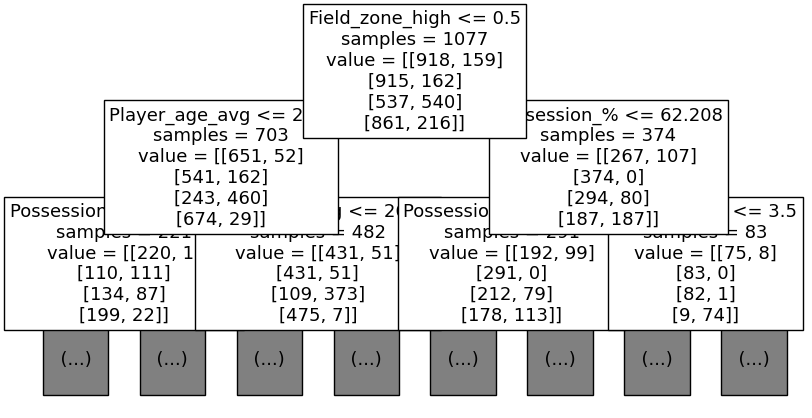

Con profundidad = 1, el resultado obtenido es: 0.44 (accuracy)

Con profundidad = 2, el resultado obtenido es: 0.52 (accuracy)

Con profundidad = 4, el resultado obtenido es: 0.72 (accuracy)

Con profundidad = 8, el resultado obtenido es: 0.92 (accuracy)

Con profundidad = 10, el resultado obtenido es: 0.92 (accuracy)

LA MEJOR PROFUNDIDAD ES: 10
Profundidad del árbol: 10
Cantidad de nodos (internos + hojas): 165
Cantidad de hojas: 83

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        31
           1       1.00      0.94      0.97        31
           2       0.98      0.96      0.97       114
           3       0.85      0.92      0.88        36

   micro avg       0.95      0.94      0.95       212
   macro avg       0.94      0.92      0.93       212
weighted avg       0.95      0.94      0.95       212
 samples avg       0.94      0.94      0.94       212



In [53]:
# Valores de la columna target. (lo que se desea predecir)
Y = df_futbol[['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4']].values

# Porción del dataframe con los atributos. (lo que se usara para predecir)
X = df_futbol.drop(columns = ['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4'])


# Porcentajes para datos de validación y test.
test_size = 0.15
val_size = 0.10

# La función train_test_split separa los datos (X, Y) en dos porciones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, random_state = 10)

# Nos guardamos los nombres de los atributos para más adelante
feature_names = X_train.columns.values[:-1]

print("Datos de entrenamiento:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_train.shape[0], X_train.shape[1]))
print("Datos de validación:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_val.shape[0], X_val.shape[1]))
print("Datos de test:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}".format(X_test.shape[0], X_test.shape[1]))

# Creamos un árbol de decisión (AD)
PROF = 5
clf = DecisionTreeClassifier(max_depth = PROF)

# Se ajusta el AD con los datos de entrenamiento
clf = clf.fit(X_train, y_train) # ajustamos el AD

print(f"¿Qué profundidad tiene el árbol creado?\n{clf.get_depth()}\n")

print(f"¿Cuántas hojas tiene el árbol?\n{clf.get_n_leaves()}\n")

print(f"¿Cuántos de los atributos fueron usados?\n{clf.n_features_in_}\n")

print(f"¿Cuántos atributos eran en total?\n{len(X_train.columns.values)}\n")

print(f"¿Qué porcentaje de aciertos tuve datos de verificación?\n{clf.score(X_val, y_val):.3} de accuracy (exactitud)\n")

print("Reporte de clasificación\n")
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

# Gráfico del árbol
feature_names = X_train.columns.values.tolist()
fig, ax = plt.subplots(figsize = (10, 5))
plot_tree(clf, max_depth = 2, fontsize = 13, feature_names = feature_names, class_names = clf.classes_, impurity = False)
plt.show()

# Lista de profundidades con valores enteros.
profundidades = [1,2,4,8,10]

mejor_profundidad = 0
mejor_puntaje = 0

for prof in profundidades:
    # Para cada profundidad, se ajusta un AD con esa profundidad máxima.
    clf = DecisionTreeClassifier(max_depth= prof)

    # Se ajusta el AD con los datos de entrenamiento
    clf = clf.fit(X_train, y_train)

    # Se calcula un resultado usando el conjunto de validación
    predictions =  clf .predict(X_val)

    puntaje = accuracy_score(y_val, predictions)

    print(f"Con profundidad = {prof}, el resultado obtenido es: {round(puntaje, 2)} (accuracy)\n")

    if puntaje > mejor_puntaje:
        mejor_profundidad = prof
        mejor_puntaje = puntaje

print("LA MEJOR PROFUNDIDAD ES:", mejor_profundidad)


# Creamos AD con profundidad máxima MAX
clf = DecisionTreeClassifier(max_depth = mejor_profundidad)

# Ajustamos el AD con los datos de entrenamiento
clf = clf.fit(X_train, y_train)

# Información sobre el AD aprendido
print("Profundidad del árbol: {}".format(clf.get_depth()))
print("Cantidad de nodos (internos + hojas): {}".format(clf.tree_.node_count))
print("Cantidad de hojas: {}".format(clf.get_n_leaves()))
print()

# Predicciones sobre el conjunto de test
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

# Desarrollo de una Red Neuronal Artificial

In [57]:
# Valores de la columna target. (lo que se desea predecir)
Y = df_futbol[['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4']].values

# Porción del dataframe con los atributos. (lo que se usara para predecir)
X = df_futbol.drop(columns = ['Position_4-a-7', 'Position_descenso', 'Position_media-tabla', 'Position_top-4'])

# Porcentajes para datos de validación y test.
test_size = 0.15
val_size = 0.10

# La función train_test_split separa los datos (X, Y) en dos porciones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, random_state = 10)

# Nos guardamos los nombres de los atributos para más adelante
feature_names = X_train.columns.values[:-1]

print("Datos de entrenamiento:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_train.shape[0], X_train.shape[1]))
print("Datos de validación:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_val.shape[0], X_val.shape[1]))
print("Datos de test:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}".format(X_test.shape[0], X_test.shape[1]))

# MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1, 1))

# El scaler se ajusta sobre los datos de entrenamiento X_train.
X_train_scl = scaler.fit_transform(X_train)
X_val_scl = scaler.transform(X_val)
X_test_scl = scaler.transform(X_test)

# Podemos ver el conjunto de datos luego de realizar la transformación.
pd.DataFrame(X_train_scl, columns = X_train.columns).head()




Datos de entrenamiento:
	Cantidad de ejemplos (filas): 1077
	Cantidad de atributos (columnas): 20

Datos de validación:
	Cantidad de ejemplos (filas): 120
	Cantidad de atributos (columnas): 20

Datos de test:
	Cantidad de ejemplos (filas): 212
	Cantidad de atributos (columnas): 20


,Matchday,Player_age_avg,Possession_%,Shots,Shots_on_target,Touches,Tackles,Clearances,Corners,Offsides,Fouls_conceded,Goals,ConcededGoals,Yellow_cards,Red_cards,Field_zone_high,Field_zone_low,Field_zone_middle,Season_21-22,Season_22-23
0,-0.243243,0.555556,0.743914,-0.367799,-0.200000,-0.306461,-0.594423,-0.784314,-0.405229,-0.582418,-0.582609,-0.142857,-0.692308,-0.814433,-0.666667,1.0,-1.0,-1.0,-1.0,1.0
1,-0.621622,0.200000,-0.536468,-0.881832,-0.853659,-0.790226,-0.695817,-0.636166,-0.882353,-0.890110,-0.678261,-0.868132,-0.512821,-0.711340,-1.000000,-1.0,-1.0,1.0,-1.0,1.0
2,0.243243,0.111111,0.179325,-0.098966,0.160976,-0.070974,-0.064639,-0.028322,-0.385621,0.098901,0.086957,-0.164835,-0.358974,0.030928,-0.666667,1.0,-1.0,-1.0,-1.0,1.0
3,0.405405,0.066667,0.466948,0.028065,0.356098,0.128239,0.013942,-0.437908,-0.019608,-0.032967,0.078261,-0.010989,-0.205128,-0.340206,-1.000000,1.0,-1.0,-1.0,-1.0,1.0
4,0.891892,0.422222,-0.441471,-0.001477,0.082927,0.139193,0.518378,0.766885,-0.241830,0.340659,0.760870,-0.230769,0.666667,0.546392,-1.000000,-1.0,1.0,-1.0,-1.0,1.0
